In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Cities in Sweden

## Create dataframe

In [20]:
cities = dict(Malmö=347949, Stockholm=975551, Uppsala=233839, Göteborg=583056)
cities = {"Cities": ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
          "Population": [347949, 975551, 233839, 583056]}
series_cities = pd.Series(cities)


## Print dataframe

In [21]:
df = pd.DataFrame(cities)
print(df)

      Cities  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056


## Print only "Göteborg"

In [22]:
df.loc[df["Cities"] == "Göteborg"]

,Cities,Population
3,Göteborg,583056


## Sort data by population

In [23]:
df.sort_values(by="Population", ascending=False)

,Cities,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


## Print only the 3 largest cities

In [24]:
df.sort_values(by="Population", ascending=False)[0:3]

,Cities,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [25]:
df["Population (%)"] = df["Population"] / 10379295 * 100

df

,Cities,Population,Population (%)
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


# 2. Cities in Sweden

In [26]:
import pandas as pd

kommuner = pd.read_excel("../Data/komtopp50_2020.xlsx", "Totalt")[6:]

list_of_titles = ("Rang 2020", "Rang 2019", "Kommun",
                  "Folkmängd 2020", "Folkmängd 2019", "Förändring")
kommuner.columns = list_of_titles
kommuner.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


## C. Sorted by population(large to small)

In [27]:
kommuner.sort_values(by="Folkmängd 2020", ascending=False)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
204,1,1.0,Stockholm,975551,974073.0,0.151734
63,2,2.0,Göteborg,583056,579281.0,0.65167
140,3,3.0,Malmö,347949,344166.0,1.099179
247,4,4.0,Uppsala,233839,230767.0,1.331213
130,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
277,286,286.0,Åsele,2805,2794.0,0.393701
11,287,287.0,Arjeplog,2718,2785.0,-2.405745
35,288,288.0,Dorotea,2498,2551.0,-2.077617
200,289,289.0,Sorsele,2442,2489.0,-1.888309


## d. Filter out the five smallest cities

In [28]:

five_smallest = kommuner.sort_values(by="Folkmängd 2020")[:5]
five_smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
18,290,290.0,Bjurholm,2387,2408.0,-0.872093
200,289,289.0,Sorsele,2442,2489.0,-1.888309
35,288,288.0,Dorotea,2498,2551.0,-2.077617
11,287,287.0,Arjeplog,2718,2785.0,-2.405745
277,286,286.0,Åsele,2805,2794.0,0.393701


## e. Calculate Swedens population using df

In [29]:
population = kommuner["Folkmängd 2020"].sum()
print(f"Swedens population 2020: {population}")

population = kommuner["Folkmängd 2019"].sum()
print(f"Swedens population 2019: {population:.0f}")

Swedens population 2020: 10379295
Swedens population 2019: 10327589


## f. Plot a bar chart for the five smallest and largest cities

Text(0.5, 1.0, 'Sveriges minsta kommuner')

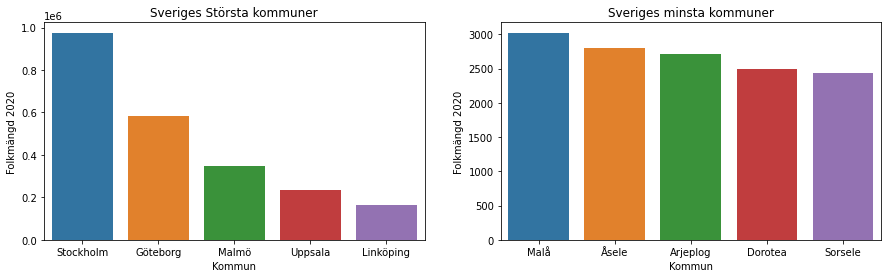

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1,2, figsize=(15,4))

stora_kommuner = kommuner.sort_values(by="Rang 2020")[0:5]
minsta_kommuner = kommuner.sort_values(by="Rang 2020")[-6:-1]
sns.barplot(ax=axes[0],data=stora_kommuner, x="Kommun", y = "Folkmängd 2020")
axes[0].set_title("Sveriges Största kommuner")
sns.barplot(ax=axes[1],data=minsta_kommuner, x="Kommun", y = "Folkmängd 2020")
axes[1].set_title("Sveriges minsta kommuner")


# 3. Cities in Sweden - Gender
## A.

In [35]:
import pandas as pd
import seaborn as sns

def import_data(data_file: str, sheet: str) -> pd.DataFrame:
    temp_name = pd.read_excel(data_file, sheet)[6:]
    list_of_titles = ("Rang 2020", "Rang 2019", "Kommun",
                  "Folkmängd 2020", "Folkmängd 2019", "Förändring")
    temp_name.columns = list_of_titles
    temp_name["Kön"] = sheet
    return temp_name

data_file = "../Data/komtopp50_2020.xlsx"
kommuner_kvinnor = import_data(data_file, "Kvinnor")
kommuner_man = import_data(data_file, "Män")

kommuner_man.head()


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,81,83.0,Ale,16256,16054.0,1.258253,Män
7,64,64.0,Alingsås,20702,20646.0,0.271239,Män
8,122,123.0,Alvesta,10367,10339.0,0.270819,Män
9,255,255.0,Aneby,3503,3498.0,0.142939,Män
10,169,168.0,Arboga,7094,7114.0,-0.281136,Män


## B. Merge the Male and Female dataframes

In [45]:
frames = [kommuner_man, kommuner_kvinnor]
merged = pd.concat(frames)
merged.set_index('Kommun')

,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,,,
Ale,81,83.0,16256,16054.0,1.258253,Män
Alingsås,64,64.0,20702,20646.0,0.271239,Män
Alvesta,122,123.0,10367,10339.0,0.270819,Män
Aneby,255,255.0,3503,3498.0,0.142939,Män
Arboga,169,168.0,7094,7114.0,-0.281136,Män
...,...,...,...,...,...,...
Österåker,55,57.0,22997,22442.0,2.473042,Kvinnor
Östhammar,117,118.0,10846,10803.0,0.398038,Kvinnor
Östra Göinge,160,159.0,7270,7262.0,0.110162,Kvinnor
